<a href="https://colab.research.google.com/github/josephbernardi/Forecasting-GDP-Using-ML/blob/master/IncorporatedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Incorporated Real GDP Forecasting Model

## General Information

Hello User,

Below is the full incorporated model meant to forecast US Real GDP. Running the model is very simple:

1. Go to -> "Runtime" in the menu above, and click on -> "Run All"

2. Below the "Setup" code section, the code will ask you to select the csv data from your local files. Select the "GDPC1.csv" file wherever you have downloaded it.

3. The model will ask you a 5 question survey to determine exogenous impact. Answer the survey carefully!

4. Enjoy! Various visualizations are visible below each code section, depending on what specific aspects of the model they depict. A holistic forecast, including all machine learning techniques and exogenous variables, is depicted in the very last code block.

### **Setup**

In [ ]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.1)


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pylab as plt
from google.colab import files
import io
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# User inputs data csv
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

f = files.upload()
inputdata = pd.read_csv(io.BytesIO(f['GDPC1.csv']))

inputdata['Date']=pd.to_datetime(inputdata['Date'])


inputdata.set_index('Date', inplace=True)

# User inputs exogenous variables
coeff_underperform = 0.17
coeff_overperform = 0.23
coeff_badevent = 0.15
coeff_goodevent = 0.25
coeff_disaster = 0.1
coeff_miracle = 0.3

def exogenous(input):
  if input == 1:
    return coeff_underperform
  if input == 2:
    return 0.2
  if input == 3:
    return coeff_overperform
  if (int(input) > 3) or (int(input) < 1):
    print("ERROR: Incorrect input value by user!")
    exit()

def special(input):
  if input == 1:
    return coeff_disaster
  if input == 2:
    return coeff_badevent
  if input == 3:
    return 0.2
  if input == 4:
    return coeff_goodevent
  if input == 5:
    return coeff_miracle
  if (int(input) > 5) or (int(input) < 1):
    print("ERROR: Incorrect input value by user!")
    exit()
  

print("ANSWER THE BELOW SURVEY - ANSWER USING THE NUMBER ASSIGNED WITH YOUR ANSWER - ANSWERS ARE TAKEN IN PROPORTION TO INFLATION \n")

print("\n\nWill household consumption do average, better, or worse in the coming years? \n \n 1) Household consumption will underperform \n 2) Household consumption will be about what it's expected to be currently \n 3) Household consumption will overperform and do a lot better than expected")
user_cons = int(input("\nEnter integer from 1-3: "))
cons = exogenous(user_cons)


print("\n\nWill investment do average, better, or worse in the coming years? \n \n 1) Investment will underperform \n 2) Investment will be about what it's expected to be currently \n 3) Investment will overperform and do a lot better than expected")
user_invest = int(input("\nEnter integer from 1-3: "))
invest = exogenous(user_invest)

print("\n\nWill government spending increase, decrease, or trend in the same way it has been in the coming years? \n \n 1) Government spending will decrease \n 2) Government spending will be about what it's expected to be currently \n 3) Government spending will increase proportionally to what it is expected to be")
user_govspend = int(input("\nEnter integer from 1-3: "))
govspend = exogenous(user_govspend)

print("\n\nWill our net exports increase, decrease, or trend in the same way it has been in the coming years? \n \n 1) Net exports will decrease \n 2) Net exports will be about what it's expected to be currently \n 3) Net exports will increase proportionally to what it is expected to be")
user_trade = int(input("\nEnter integer from 1-3: "))
trade = exogenous(user_trade)

print("\n\nIn the next few years, will their be a disaster or miracle to our economy? And if so, to what extent? \n \n 1) There will be a catastrophic disaster, it will be hard for our economy to recover \n 2) There will be a disaster, but it will be containable \n 3) Things will go on as usual, no disaster or miracle.... \n 4) There will be a sizable miracle event, but it won't redefine everything completely \n 5) A holiday miracle will occur, and will completely redefine our economy!")
user_special = int(input("\nEnter integer from 1-5: "))
special = special(user_special)

exototal = cons + invest + govspend + trade + special




Saving GDPC1.csv to GDPC1 (6).csv
ANSWER THE BELOW SURVEY - ANSWER USING THE NUMBER ASSIGNED WITH YOUR ANSWER - ANSWERS ARE TAKEN IN PROPORTION TO INFLATION 



Will household consumption do average, better, or worse in the coming years? 
 
 1) Household consumption will underperform 
 2) Household consumption will be about what it's expected to be currently 
 3) Household consumption will overperform and do a lot better than expected

Enter integer from 1-3: 3


Will investment do average, better, or worse in the coming years? 
 
 1) Investment will underperform 
 2) Investment will be about what it's expected to be currently 
 3) Investment will overperform and do a lot better than expected

Enter integer from 1-3: 2


Will government spending increase, decrease, or trend in the same way it has been in the coming years? 
 
 1) Government spending will decrease 
 2) Government spending will be about what it's expected to be currently 
 3) Government spending will increase proportional

### **ARIMA and Holt Winters Functions**

In [ ]:
def ARIMA(data):

  # fit model
  from statsmodels.tsa import arima_model
  model = arima_model.ARIMA(data, order=(1,0,0))
  res = model.fit()
  predvals = res.predict(start='7/1/2020', end='1/1/2024')

  return predvals

In [ ]:
def HoltWinters(data):
  import matplotlib.pylab as plt2
  from matplotlib.pylab import rcParams

  data.index.freq = 'QS-OCT'
  train, test = data.iloc[:292, 0], data.iloc[292:, 0]
  model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4, damped=True)
  hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
  pred = hw_model.predict(start='4/1/2020', end='1/1/2024')

  return pred

### **ARIMA and Holt Winters Model**

ARIMA + Holt Winters Model Predictions
                Real GDP
Date                    
2020-07-01  18377.273287
2020-10-01  19073.742871
2021-01-01  19122.926976
2021-04-01  19166.784907
2021-07-01  19218.259150
2021-10-01  19272.236332
2022-01-01  19319.442446
2022-04-01  19361.342097
2022-07-01  19410.877573
2022-10-01  19462.935310
2023-01-01  19508.241104
2023-04-01  19548.259372
2023-07-01  19595.932215
2023-10-01  19646.145878
2024-01-01  19689.625976


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will b

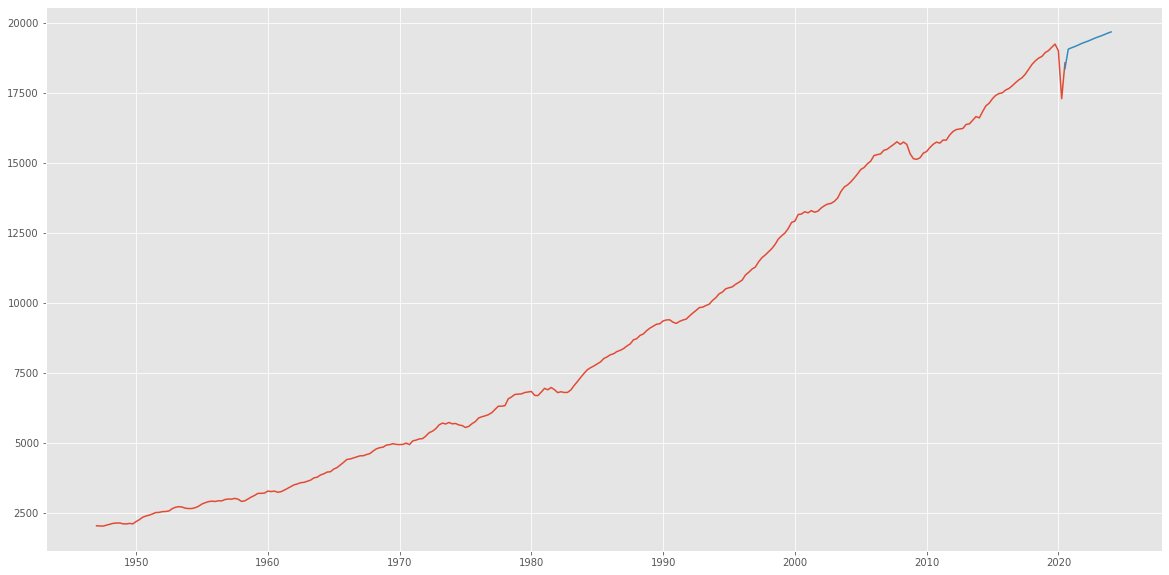

In [ ]:
from statistics import mean

arimalst = []
HWlst = []

for i in ARIMA(inputdata):
  arimalst.append(i)

for j in HoltWinters(inputdata):
  HWlst.append(j)


meanlst = [(g + h) / 2 for g, h in zip(arimalst, HWlst)]

futuredates = ['2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01', '2024-01-01']

preddata = pd.DataFrame()
preddata['Date'] = pd.Series(futuredates)
preddata['Real GDP'] = pd.Series(meanlst)

preddata['Date']=pd.to_datetime(preddata['Date'])


preddata.set_index('Date', inplace=True)

print("ARIMA + Holt Winters Model Predictions")
print(preddata)


plt.plot(inputdata.index, inputdata, label='Existing')
plt.plot(preddata.index, preddata, label='Forecast')



### **LSTM Model**

Epoch 1/100
4/4 [==============================] - 0s 84ms/step - loss: 0.2643
Epoch 2/100
4/4 [==============================] - 0s 82ms/step - loss: 0.1606
Epoch 3/100
4/4 [==============================] - 0s 84ms/step - loss: 0.1045
Epoch 4/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0317
Epoch 5/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0055
Epoch 6/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0176
Epoch 7/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0182
Epoch 8/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0108
Epoch 9/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0056
Epoch 10/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0058
Epoch 11/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0048
Epoch 12/100
4/4 [==============================] - 0s 84ms/step - loss: 0.0035
Epoch 13/100
4/4 [==============================]

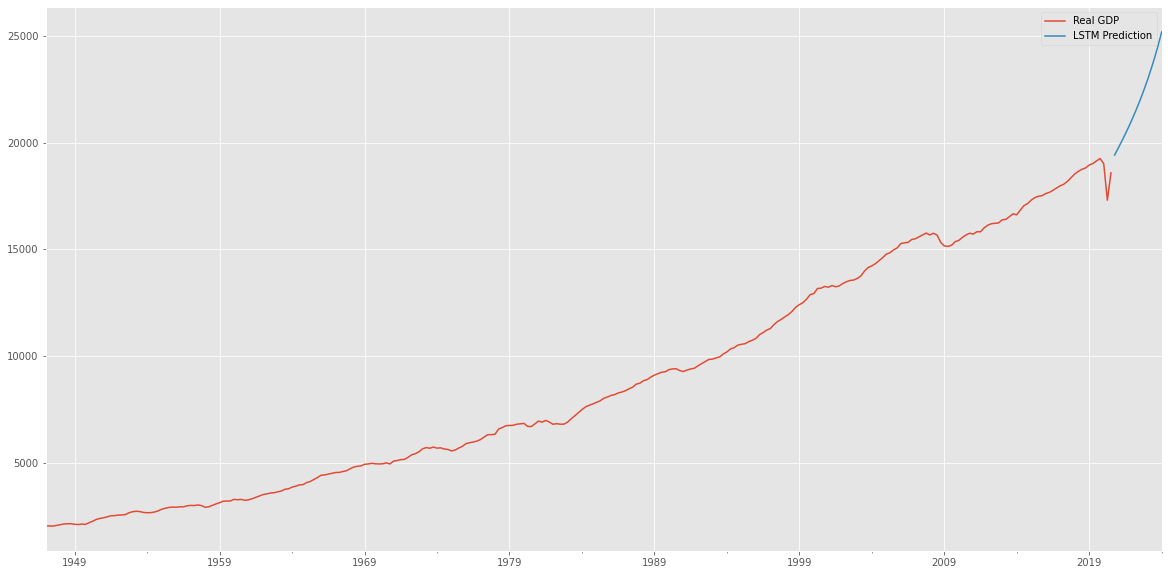

In [ ]:
from google.colab import files
import io

import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings


scaler = MinMaxScaler()
scaler.fit(inputdata)
trainingdata = scaler.transform(inputdata[:292])

generator = TimeseriesGenerator(trainingdata, trainingdata, length=43, batch_size=64)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(43, 1)))
model.add(Dropout(0.15))
model.add(Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# IMPORTANT: below code structure that allows the model to peer past training and test data is
# based on the architecture composed by Andrej Baranovskij in the article "Time-Series Prediction Beyond Test Data"
# Link: https://towardsdatascience.com/time-series-prediction-beyond-test-data-3f4625019fd9

history = model.fit(generator,epochs=100,verbose=1)

predictionlst = []

batch = trainingdata[-43:].reshape((1, 43, 1))

for i in range(43):   
    predictionlst.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[predictionlst[i]]],axis=1)

    
add_dates = [inputdata.index[-1] + DateOffset(months=x) for x in range(0,44) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=inputdata.columns)

predictions = pd.DataFrame(scaler.inverse_transform(predictionlst),
                          index=future_dates[-43:].index, columns=['LSTM Prediction'])



LSTM_predictions = predictions[2::3]

LSTM_final = pd.concat([inputdata,LSTM_predictions], axis=1)

print("LSTM Model Predictions")
print(LSTM_predictions)

LSTM_final.plot()



### **Averaged Model (ARIMA/Holt Winters + LSTM)**

Incorporated Model Predictions (without exogenous impact)
                Real GDP
Date                    
2020-10-01  19244.850838
2021-01-01  19431.678909
2021-04-01  19620.123478
2021-07-01  19818.633826
2021-10-01  20025.908282
2022-01-01  20238.606965
2022-04-01  20458.720278
2022-07-01  20693.893245
2022-10-01  20943.107557
2023-01-01  21203.675393
2023-04-01  21478.392242
2023-07-01  21776.104647
2023-10-01  22097.074896
2024-01-01  22440.304521


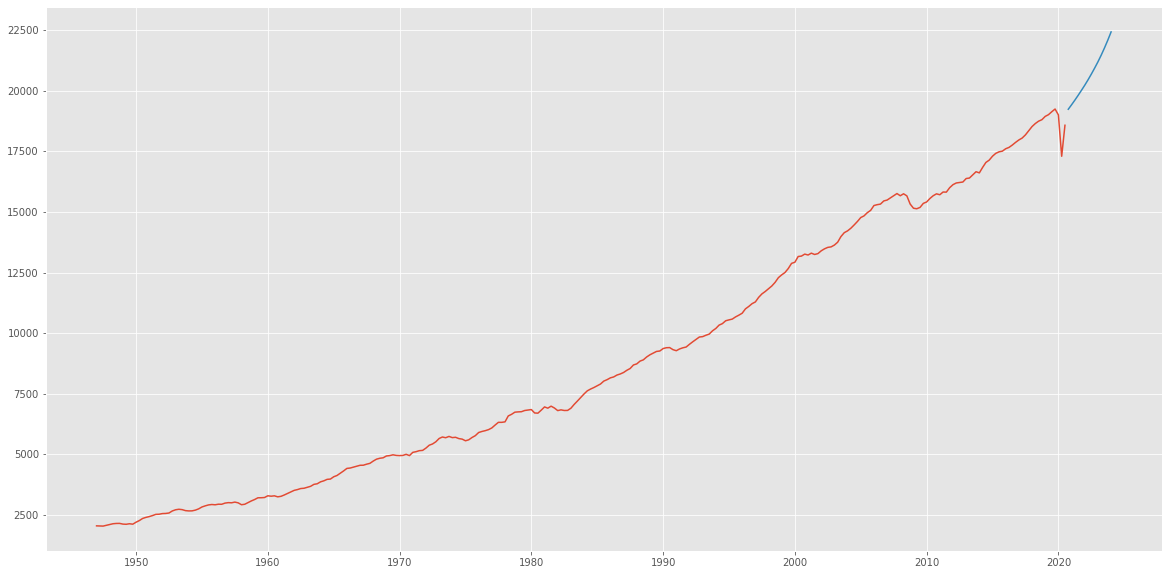

In [ ]:


LSTMlst = []
for x in LSTM_predictions['LSTM Prediction']:
  LSTMlst.append(x)
meanlst2 = meanlst[1:]

newmeanlst = [(g + h) / 2 for g, h in zip(LSTMlst, meanlst2)]



newpreddata = pd.DataFrame()
newpreddata['Date'] = pd.Series(futuredates[1:])
newpreddata['Real GDP'] = pd.Series(newmeanlst)

newpreddata['Date']=pd.to_datetime(newpreddata['Date'])


newpreddata.set_index('Date', inplace=True)

print("Incorporated Model Predictions (without exogenous impact)")
print(newpreddata)

plt.plot(inputdata.index, inputdata, label='Existing')
plt.plot(newpreddata.index, newpreddata, label='Forecast')

### **Incorporated Model w/ Exogenous Variables**

Incorporated Model Predictions, including exogenous impact
                Real GDP  Exogenous Predictions
Date                                           
2020-10-01  19244.850838           20976.887413
2021-01-01  19431.678909           21180.530011
2021-04-01  19620.123478           21385.934591
2021-07-01  19818.633826           21602.310870
2021-10-01  20025.908282           21828.240027
2022-01-01  20238.606965           22060.081592
2022-04-01  20458.720278           22300.005103
2022-07-01  20693.893245           22556.343637
2022-10-01  20943.107557           22827.987237
2023-01-01  21203.675393           23112.006179
2023-04-01  21478.392242           23411.447544
2023-07-01  21776.104647           23735.954065
2023-10-01  22097.074896           24085.811636
2024-01-01  22440.304521           24459.931928


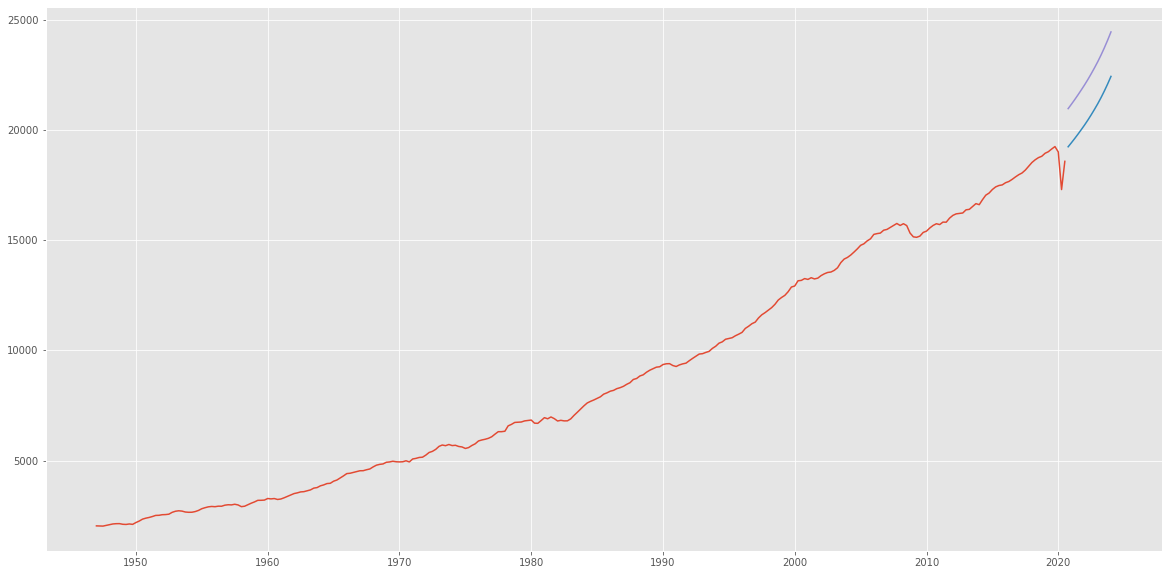

In [ ]:
newpreddata['Exogenous Predictions'] = (newpreddata['Real GDP'] * exototal)

print("Incorporated Model Predictions, including exogenous impact")
print(newpreddata)

plt.plot(inputdata.index, inputdata, label='Existing')
plt.plot(newpreddata.index, newpreddata, label='Forecast')
